 <h1>E-commerce Analytics for Segmentation, Prediction and Fraud Detection</h1>

<div style="border-radius:20px ;border:3px solid #c54E58 ;color : Orange;  padding: 15px; font-size: 14pt; background-color:black; text-align:justify">
    
This project focuses on developing an e-commerce analytics platform to provide insights into customer behavior, product performance, and fraud detection. In the e-commerce domain, businesses encounter challenges in understanding customer preferences, optimizing product offerings, and detecting fraudulent activities, which can impact revenue and trust.

To address these challenges, we will leverage advanced analytics and machine learning techniques to develop predictive models and analytics tools tailored for e-commerce analytics.

The dataset used for this project comprises customer information such as Customer ID, Gender, Age, City, Membership Type, Total Spend, Items Purchased, Average Rating, Discount Applied, Days Since Last Purchase, and Satisfaction Level. By analyzing these features, we aim to uncover patterns and trends that can enhance decision-making in marketing, sales, and customer relationship management.

In addition to predictive analytics, we will develop a fraud detection module to identify suspicious transactions and activities. This module will utilize anomaly detection algorithms to flag potentially fraudulent behavior, enabling businesses to mitigate risks and protect their assets.

Overall, this project aims to provide valuable insights and tools for e-commerce businesses to optimize their operations, improve customer satisfaction, and minimize fraud-related losses.

</div>


<h3> Import Libraries </h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import sweetviz as sv
pd.set_option('display.max_columns', None)
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.gridspec as gridspec
%matplotlib inline
from datetime import timedelta, date
from scipy import stats
import statsmodels.api as sm
import joblib
from sklearn.preprocessing import StandardScaler


c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Loading the Dataset

In [3]:
# Load the provided dataframe
df = pd.read_csv("merged_data.csv")  # Replace "path_to_your_dataframe.csv" with the actual path

# Displaying the first few rows of the dataframe
df.head()

,Customer ID,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn,InvoiceNo,Description,UnitPrice,Country,Tenure,PreferredLoginDevice,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,payment,timestamp,rating,order_status,payment_installments,Ship Mode,Segment,City,State/Province,Postal Code,Product ID,Sub-Category,Product Name,Sales,Discount,Profit,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,44605.0,Home,177.0,1.0,2427.0,PayPal,31.0,1.0,John Rivera,Female,0.0,536365,WHITE HANGING HEART T-LIGHT HOLDER,2.55,United Kingdom,4.0,Mobile Phone,6.0,3.0,3.0,Laptop & Accessory,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93,1095.65,2017-11-21 22:34:00,5.0,delivered,5.0,Standard Class,Consumer,Houston,Texas,77095,OFF-PA-10000174,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,0.2,5.5512,Gold,1120.2,14.0,4.6,True,25.0,Satisfied
1,44605.0,Electronics,396.0,3.0,937.0,Cash,31.0,0.0,John Rivera,Female,0.0,536365,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,United Kingdom,0.0,Phone,15.0,2.0,4.0,Laptop & Accessory,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07,585.95,2018-01-06 22:22:00,4.0,delivered,1.0,Standard Class,Home Office,Naperville,Illinois,60540,OFF-ST-10002743,Storage,SAFCO Boltless Steel Shelving,272.736,0.2,-64.7748,Gold,1480.3,19.0,4.7,False,12.0,Satisfied
2,13738.0,Home,191.0,3.0,3722.0,Credit Card,27.0,1.0,Lauren Johnson,Female,0.0,536365,SET 7 BABUSHKA NESTING BOXES,7.65,United Kingdom,0.0,Computer,22.0,3.0,5.0,Mobile Phone,Single,2.0,1.0,22.0,4.0,6.0,7.0,139.19,238.61,2018-04-08 21:57:00,5.0,delivered,8.0,Standard Class,Home Office,Henderson,Kentucky,42420,FUR-CH-10004063,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,0.0,746.4078,Bronze,440.8,8.0,3.1,False,22.0,Neutral
3,33969.0,Home,304.0,1.0,3883.0,PayPal,27.0,1.0,Carol Allen,Male,0.0,536367,POPPY'S PLAYHOUSE KITCHEN,2.10,United Kingdom,11.0,Mobile Phone,6.0,3.0,4.0,Fashion,Single,10.0,1.0,13.0,0.0,1.0,0.0,153.81,1629.33,2017-07-18 14:26:00,5.0,delivered,1.0,Second Class,Consumer,Los Angeles,California,90049,OFF-PA-10002005,Paper,Xerox 225,19.440,0.0,9.3312,Bronze,470.5,7.0,3.2,False,20.0,Neutral
4,33969.0,Books,54.0,2.0,4187.0,PayPal,27.0,0.0,Carol Allen,Male,0.0,536367,FELTCRAFT PRINCESS CHARLOTTE DOLL,3.75,United Kingdom,0.0,Phone,11.0,2.0,3.0,Mobile,Single,2.0,1.0,13.0,2.0,2.0,2.0,134.41,428.80,2018-07-16 12:41:00,5.0,delivered,3.0,Standard Class,Home Office,Henderson,Kentucky,42420,TEC-PH-10004539,Phones,Wireless Extenders zBoost YX545 SOHO Signal Bo...,755.960,0.0,204.1092,Gold,1200.8,16.0,4.3,True,21.0,Satisfied


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  159 non-null    float64
 1   Product Category             159 non-null    object 
 2   Product Price                159 non-null    float64
 3   Quantity                     159 non-null    float64
 4   Total Purchase Amount        159 non-null    float64
 5   Payment Method               159 non-null    object 
 6   Customer Age                 159 non-null    float64
 7   Returns                      159 non-null    float64
 8   Customer Name                159 non-null    object 
 9   Gender                       159 non-null    object 
 10  Churn                        159 non-null    float64
 11  InvoiceNo                    159 non-null    object 
 12  Description                  159 non-null    object 
 13  UnitPrice           

In [26]:
df.shape

(159, 52)

In [27]:
df.columns

Index(['Customer ID', 'Product Category', 'Product Price', 'Quantity',
       'Total Purchase Amount', 'Payment Method', 'Customer Age', 'Returns',
       'Customer Name', 'Gender', 'Churn', 'InvoiceNo', 'Description',
       'UnitPrice', 'Country', 'Tenure', 'PreferredLoginDevice',
       'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'payment', 'timestamp', 'rating',
       'order_status', 'payment_installments', 'Ship Mode', 'Segment', 'City',
       'State/Province', 'Postal Code', 'Product ID', 'Sub-Category',
       'Product Name', 'Sales', 'Discount', 'Profit', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [28]:
#Lets describe numerical features
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Churn,UnitPrice,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,payment,rating,payment_installments,Sales,Discount,Profit,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,25375.471698,248.572327,2.937107,2808.477987,43.496855,0.528302,0.201258,3.308931,8.968553,14.672956,2.402516,3.345912,4.062893,0.295597,15.144654,1.402516,2.578616,4.213836,159.286667,283.946855,4.100629,3.754717,230.652541,0.133019,25.085772,861.789623,12.767296,4.035220,26.295597
std,14478.556745,141.692726,1.315369,1472.487230,15.733490,0.500776,0.402207,2.644032,8.539870,7.982177,0.552549,0.762967,2.668820,0.457753,3.608774,2.114206,2.864854,3.200800,27.015065,241.791128,1.406112,2.887592,487.857332,0.196877,109.044618,367.222289,4.175266,0.589801,13.132024
min,1254.000000,10.000000,1.000000,244.000000,18.000000,0.000000,0.000000,0.290000,0.000000,6.000000,1.000000,2.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.670000,1.000000,1.000000,2.368000,0.000000,-553.647600,420.800000,7.000000,3.000000,9.000000
25%,13563.500000,129.000000,2.000000,1419.000000,31.000000,0.000000,0.000000,1.450000,1.000000,8.000000,2.000000,3.000000,2.000000,0.000000,12.000000,0.000000,1.000000,2.000000,143.320000,97.070000,4.000000,1.000000,17.274000,0.000000,2.342450,505.750000,9.500000,3.500000,15.000000
50%,23699.000000,253.000000,3.000000,2958.000000,45.000000,1.000000,0.000000,2.550000,8.000000,13.000000,2.000000,3.000000,3.000000,0.000000,14.000000,1.000000,1.000000,3.000000,153.810000,290.290000,5.000000,3.000000,52.096000,0.000000,8.619000,780.200000,12.000000,4.100000,23.000000
75%,37889.000000,370.000000,4.000000,3981.500000,56.500000,1.000000,0.000000,4.950000,14.000000,17.000000,3.000000,4.000000,5.500000,1.000000,17.000000,2.000000,3.000000,7.000000,170.370000,381.870000,5.000000,6.000000,202.935000,0.200000,29.254300,1170.550000,15.500000,4.550000,37.000000
max,49818.000000,499.000000,5.000000,5289.000000,70.000000,1.000000,1.000000,16.950000,30.000000,35.000000,3.000000,5.000000,10.000000,1.000000,25.000000,13.000000,15.000000,12.000000,291.970000,1629.330000,5.000000,10.000000,4164.050000,0.800000,746.407800,1500.100000,21.000000,4.900000,61.000000


In [29]:
#Lets describe categorical features
df.describe(include='object')

,Product Category,Payment Method,Customer Name,Gender,InvoiceNo,Description,Country,PreferredLoginDevice,PreferedOrderCat,MaritalStatus,timestamp,order_status,Ship Mode,Segment,City,State/Province,Postal Code,Product ID,Sub-Category,Product Name,Membership Type,Satisfaction Level
count,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159
unique,4,3,53,2,29,132,3,3,5,3,145,4,4,3,71,30,82,152,15,151,3,3
top,Home,Credit Card,Curtis Smith,Male,536401,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,Mobile Phone,Laptop & Accessory,Divorced,2018-06-01 23:02:00,delivered,Standard Class,Consumer,New York City,California,10024,OFF-BI-10001196,Binders,AT&T CL82213,Gold,Satisfied
freq,48,59,8,95,15,4,143,59,91,69,4,155,101,74,15,26,8,2,29,2,58,62


In [31]:
#Checking for Duplicates and Null values as well as the data types
print(df.duplicated().sum())

table = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isna().sum(),
    'Type':df.dtypes.values
})
display(table)

0


,Unique,Null,Type
Customer ID,53,0,float64
Product Category,4,0,object
Product Price,136,0,float64
Quantity,5,0,float64
Total Purchase Amount,156,0,float64
Payment Method,3,0,object
Customer Age,34,0,float64
Returns,2,0,float64
Customer Name,53,0,object
Gender,2,0,object


##### Insights From Data Overview

-There is no null values

-There is no duplicate value


#### Data Distribution 

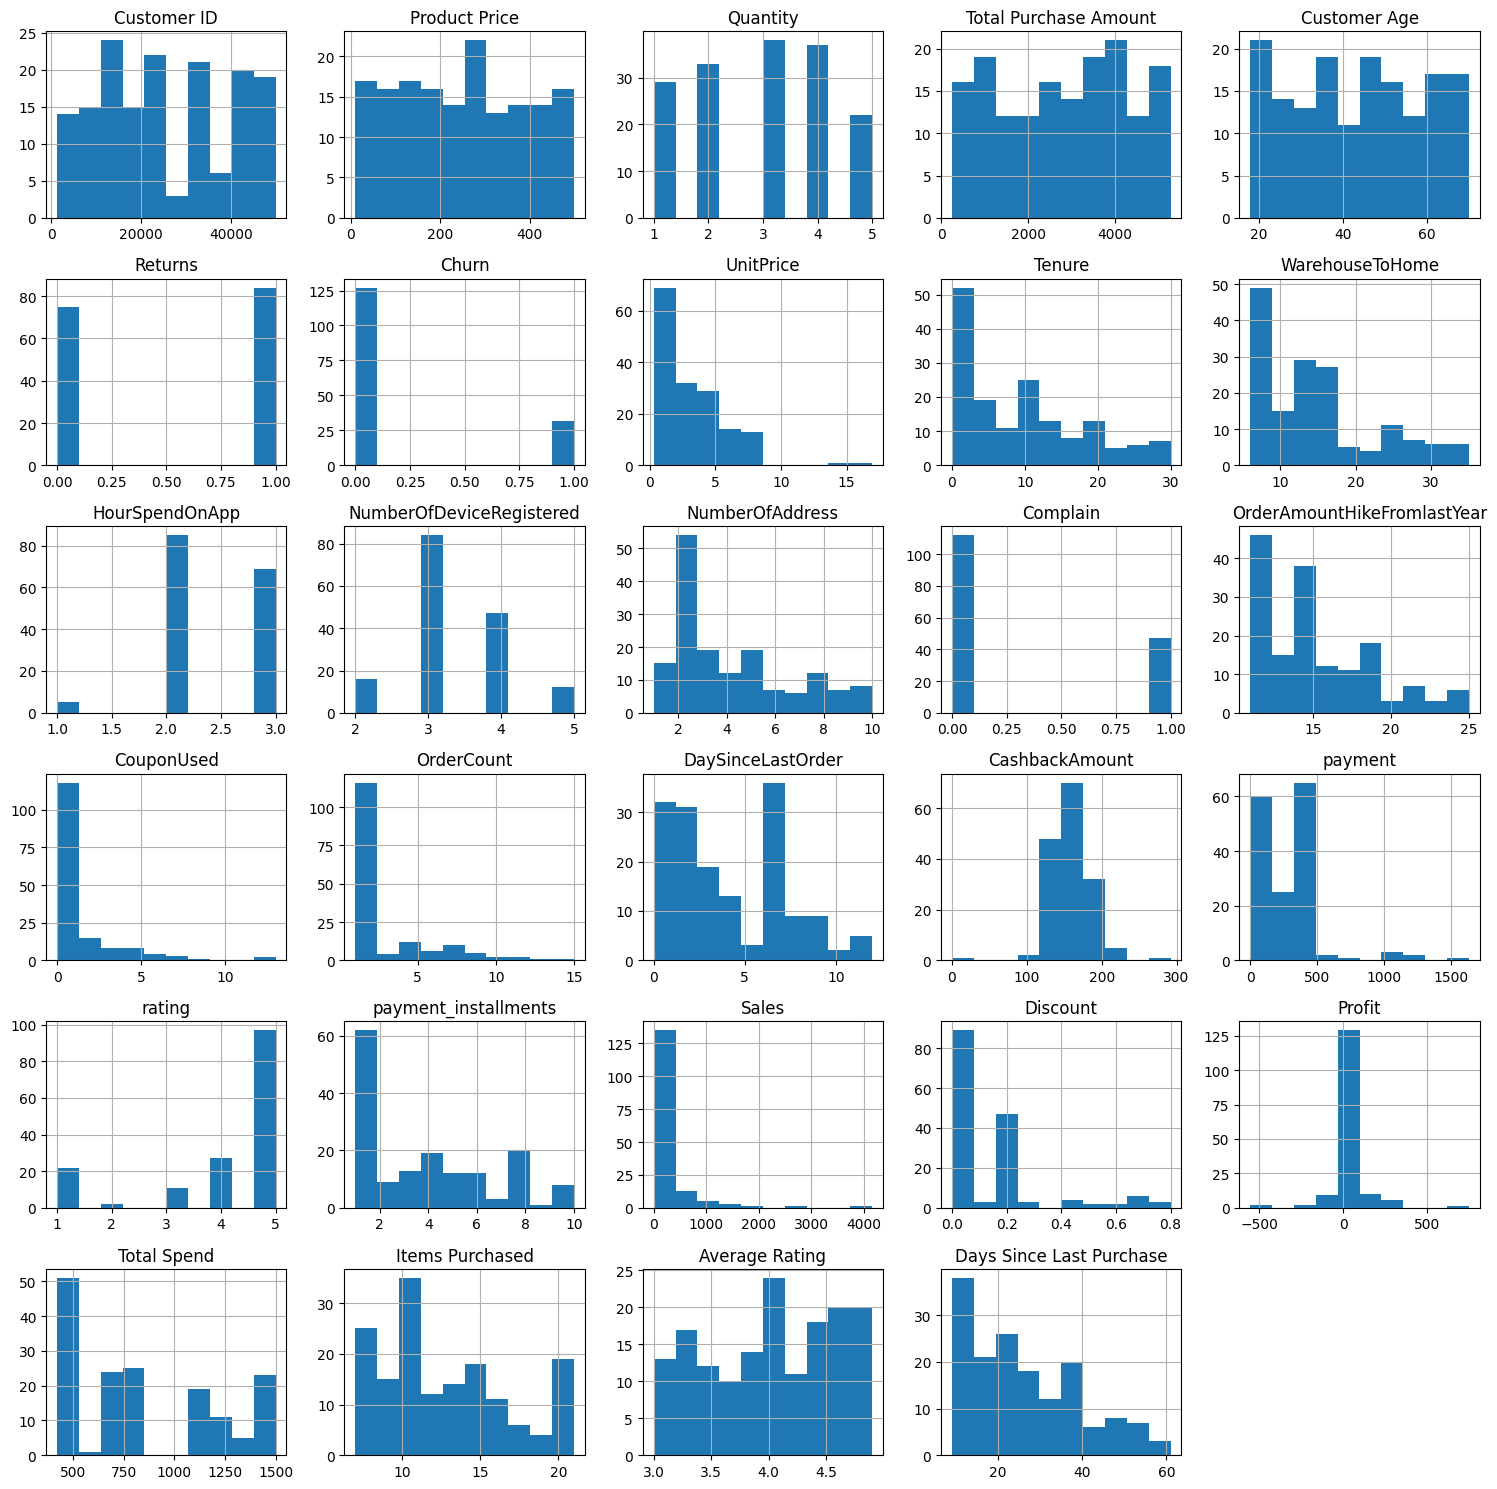

In [32]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

#### Distribution of Categorical features


#### Segmentation Distribution

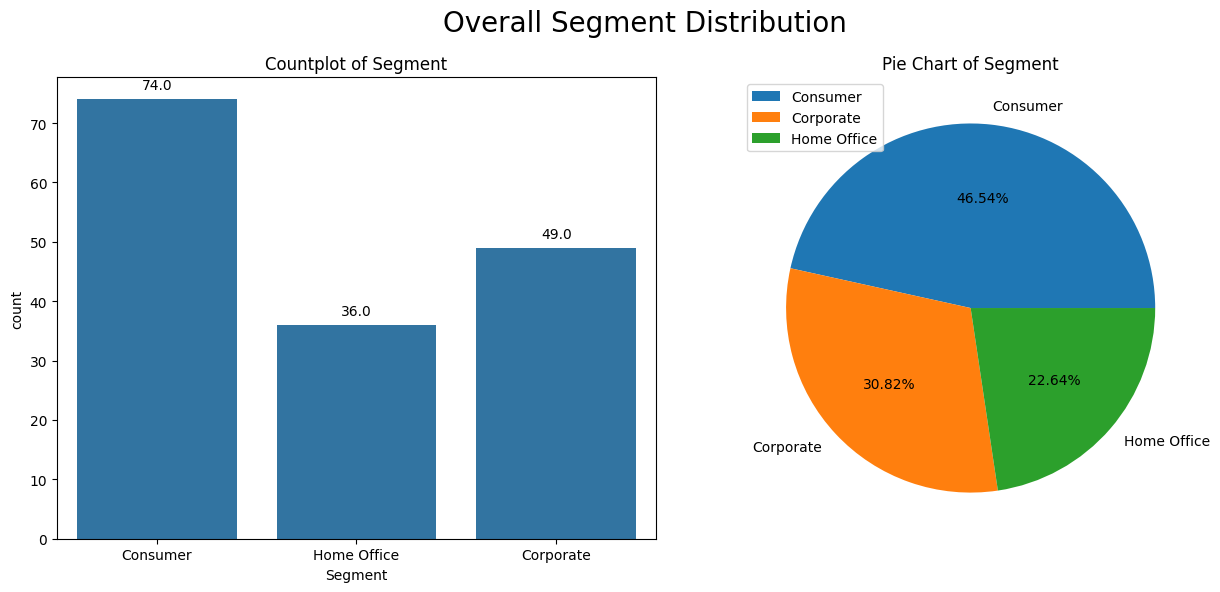

In [21]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Countplot
sns.countplot(x="Segment", data=df, ax=axes[0])
axes[0].set_title("Countplot of Segment")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

# Pie chart
explode = [0] * len(df["Segment"].value_counts())
axes[1].pie(df["Segment"].value_counts(), labels=df["Segment"].value_counts().index, autopct='%1.2f%%', explode=explode)
axes[1].set_title("Pie Chart of Segment")
axes[1].legend()

plt.suptitle("Overall Segment Distribution", fontsize=20)

plt.tight_layout()
plt.show()

#### Product Category Distribution

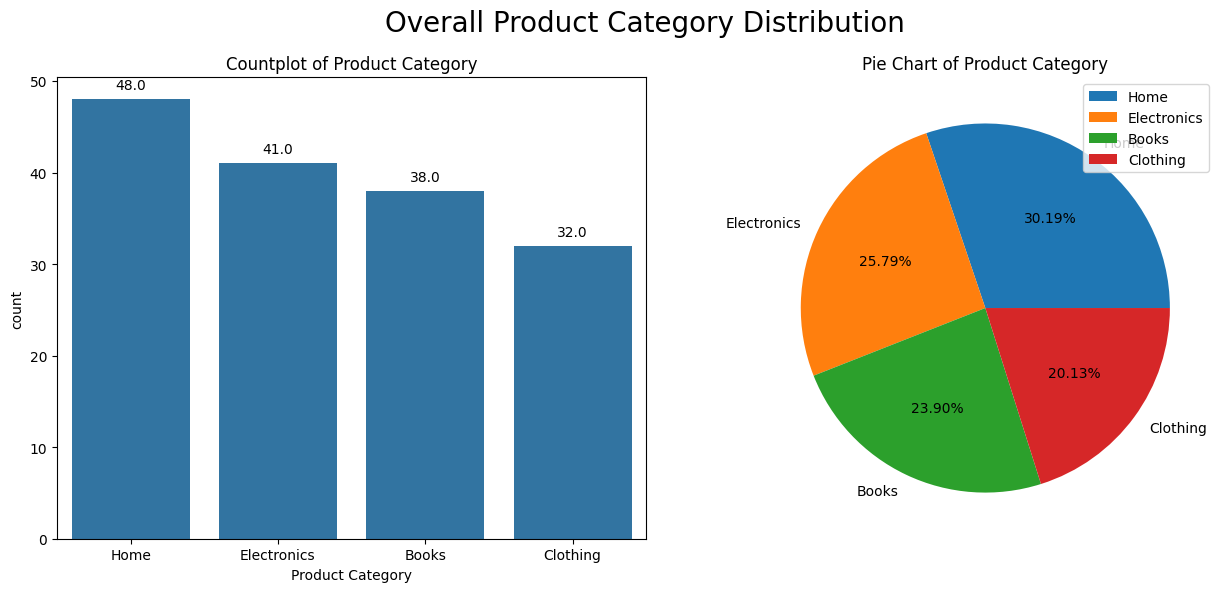

In [33]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Countplot
sns.countplot(x="Product Category", data=df, ax=axes[0])
axes[0].set_title("Countplot of Product Category")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

# Pie chart
explode = [0] * len(df["Product Category"].value_counts())
axes[1].pie(df["Product Category"].value_counts(), labels=df["Product Category"].value_counts().index, autopct='%1.2f%%', explode=explode)
axes[1].set_title("Pie Chart of Product Category")
axes[1].legend()

plt.suptitle("Overall Product Category Distribution", fontsize=20)

plt.tight_layout()
plt.show()

#### Sub-Category Distribution

C:\Users\Edidem\AppData\Local\Temp\ipykernel_21524\4038588727.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


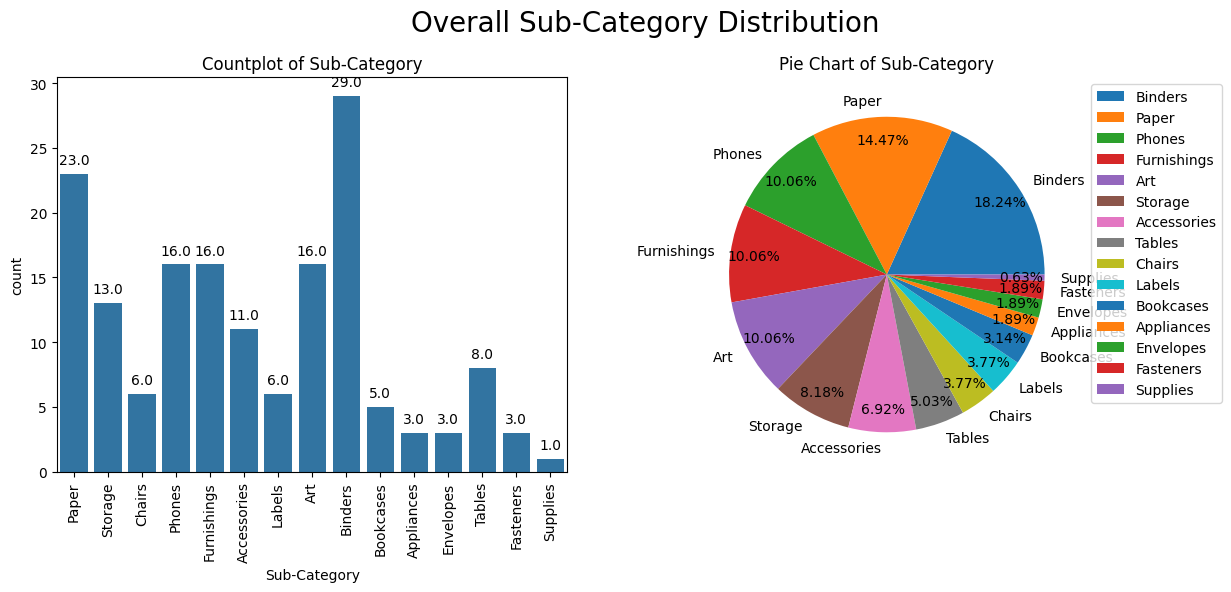

In [37]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Countplot
sns.countplot(x="Sub-Category", data=df, ax=axes[0])
axes[0].set_title("Countplot of Sub-Category")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Pie chart
explode = [0] * len(df["Sub-Category"].value_counts())
axes[1].pie(df["Sub-Category"].value_counts(), labels=df["Sub-Category"].value_counts().index, autopct='%1.2f%%', explode=explode, pctdistance=0.85)
axes[1].set_title("Pie Chart of Sub-Category")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Overall Sub-Category Distribution", fontsize=20)

plt.tight_layout()
plt.show()

#### Gender Distribution

C:\Users\Edidem\AppData\Local\Temp\ipykernel_21524\886383273.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


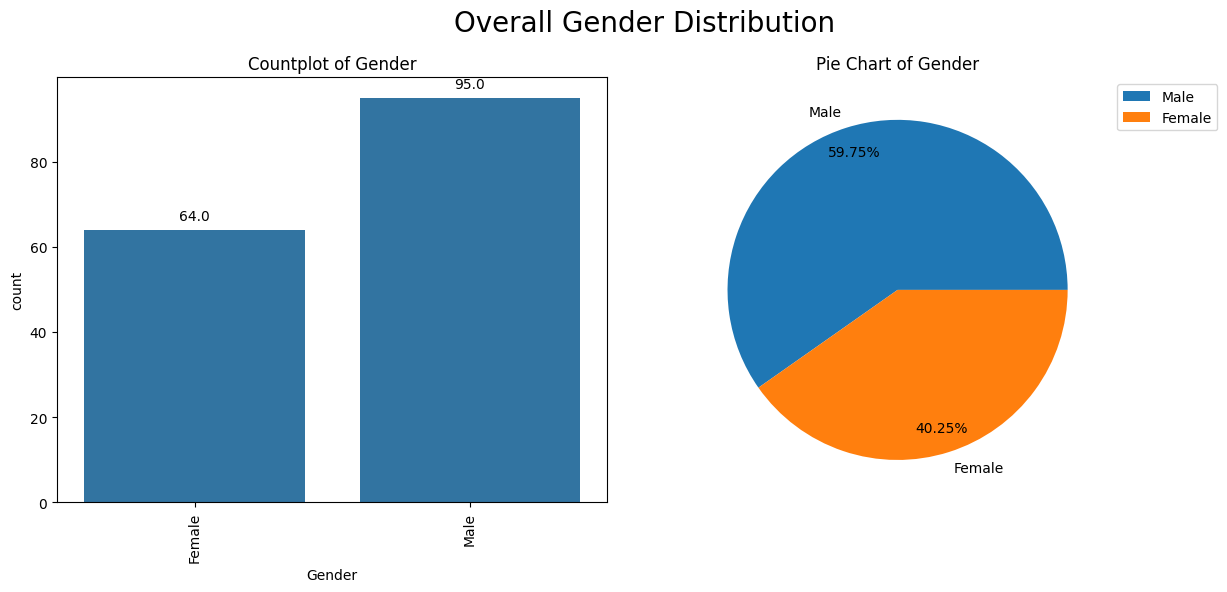

In [38]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Countplot
sns.countplot(x="Gender", data=df, ax=axes[0])
axes[0].set_title("Countplot of Gender")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Pie chart
explode = [0] * len(df["Gender"].value_counts())
axes[1].pie(df["Gender"].value_counts(), labels=df["Gender"].value_counts().index, autopct='%1.2f%%', explode=explode, pctdistance=0.85)
axes[1].set_title("Pie Chart of Gender")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Overall Gender Distribution", fontsize=20)

plt.tight_layout()
plt.show()

#### Marital Status

C:\Users\Edidem\AppData\Local\Temp\ipykernel_21524\3426209585.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


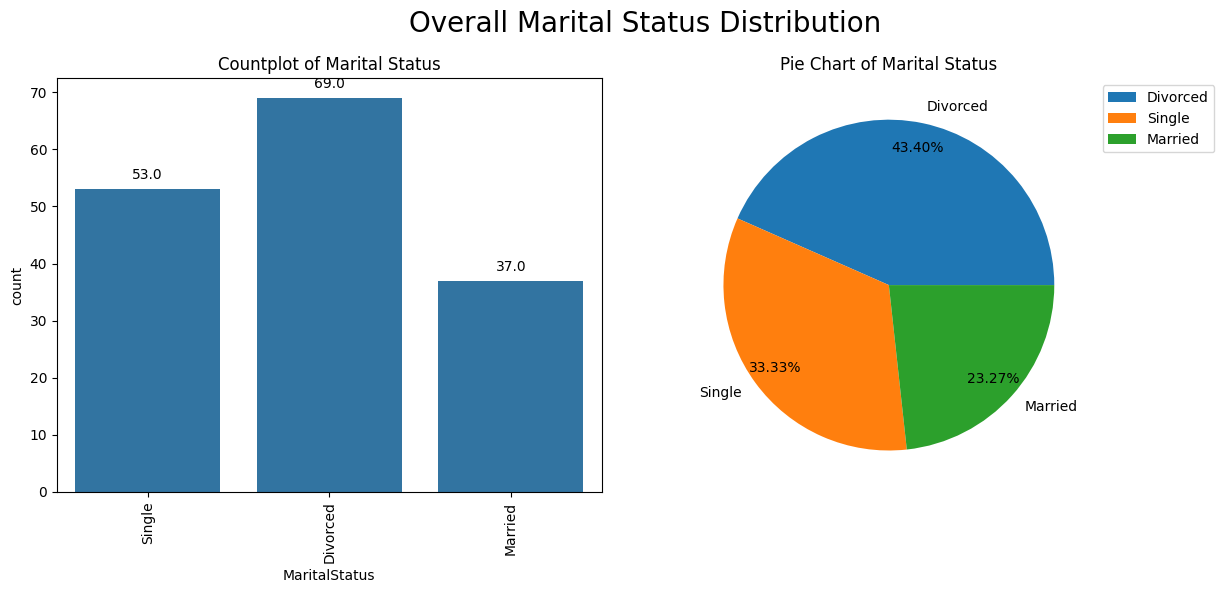

In [39]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Countplot
sns.countplot(x="MaritalStatus", data=df, ax=axes[0])
axes[0].set_title("Countplot of Marital Status")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Pie chart
explode = [0] * len(df["MaritalStatus"].value_counts())
axes[1].pie(df["MaritalStatus"].value_counts(), labels=df["MaritalStatus"].value_counts().index, autopct='%1.2f%%', explode=explode, pctdistance=0.85)
axes[1].set_title("Pie Chart of Marital Status")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Overall Marital Status Distribution", fontsize=20)

plt.tight_layout()
plt.show()

#### Preferred Login Device

C:\Users\Edidem\AppData\Local\Temp\ipykernel_21524\3104260081.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


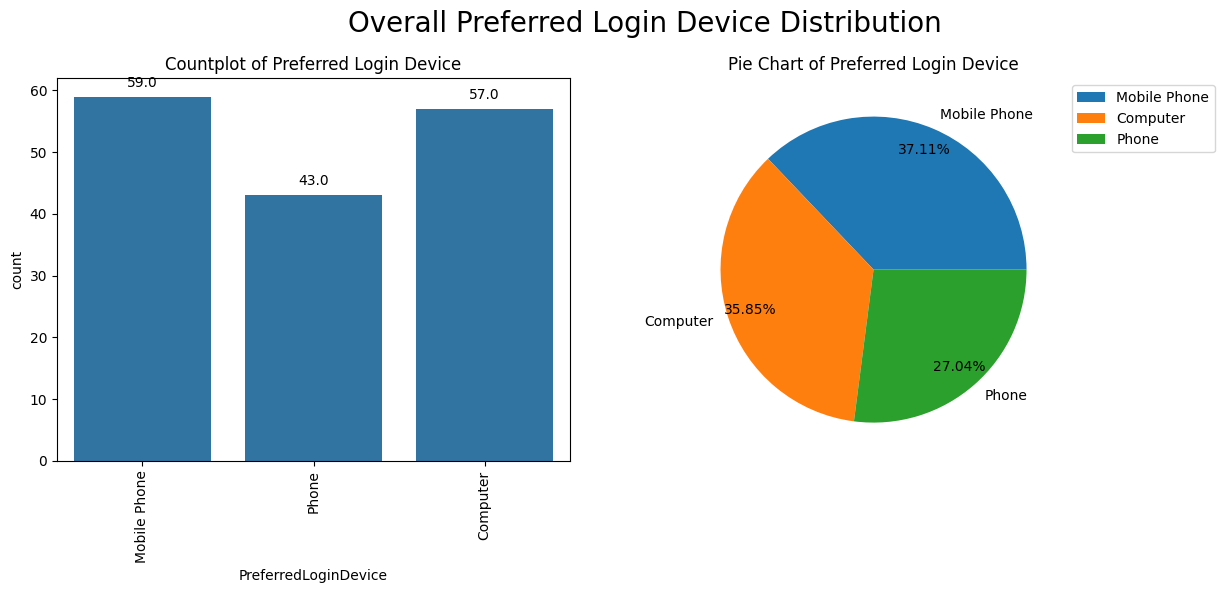

In [42]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Countplot
sns.countplot(x="PreferredLoginDevice", data=df, ax=axes[0])
axes[0].set_title("Countplot of Preferred Login Device")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Pie chart
explode = [0] * len(df["PreferredLoginDevice"].value_counts())
axes[1].pie(df["PreferredLoginDevice"].value_counts(), labels=df["PreferredLoginDevice"].value_counts().index, autopct='%1.2f%%', explode=explode, pctdistance=0.85)
axes[1].set_title("Pie Chart of Preferred Login Device")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Overall Preferred Login Device Distribution", fontsize=20)

plt.tight_layout()
plt.show()

#### Payment Method

C:\Users\Edidem\AppData\Local\Temp\ipykernel_21524\3583153002.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


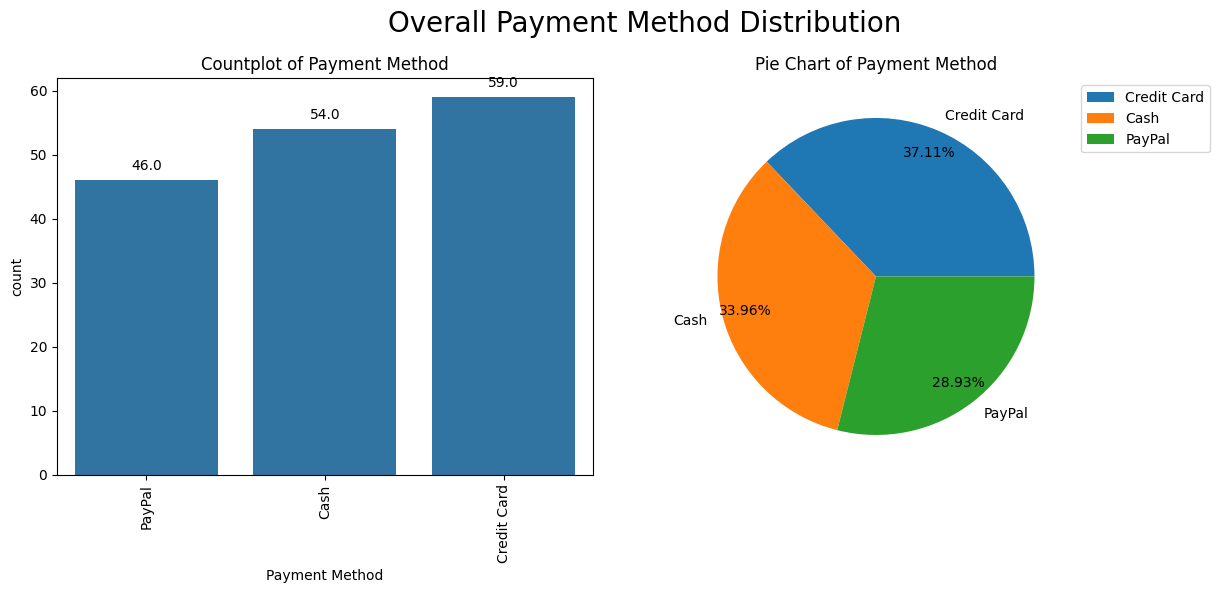

In [43]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Countplot
sns.countplot(x="Payment Method", data=df, ax=axes[0])
axes[0].set_title("Countplot of Payment Method")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Pie chart
explode = [0] * len(df["Payment Method"].value_counts())
axes[1].pie(df["Payment Method"].value_counts(), labels=df["Payment Method"].value_counts().index, autopct='%1.2f%%', explode=explode, pctdistance=0.85)
axes[1].set_title("Pie Chart of Payment Method")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Overall Payment Method Distribution", fontsize=20)

plt.tight_layout()
plt.show()

#### Order Status

C:\Users\Edidem\AppData\Local\Temp\ipykernel_21524\4047528823.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


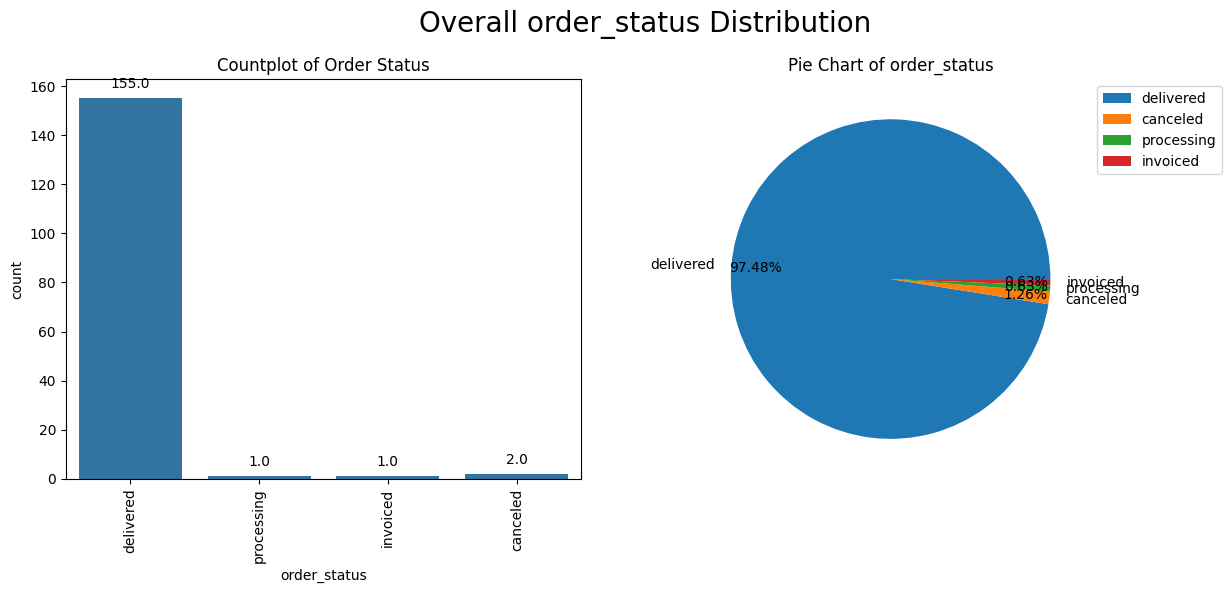

In [45]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Countplot
sns.countplot(x="order_status", data=df, ax=axes[0])
axes[0].set_title("Countplot of Order Status")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Pie chart
explode = [0] * len(df["order_status"].value_counts())
axes[1].pie(df["order_status"].value_counts(), labels=df["order_status"].value_counts().index, autopct='%1.2f%%', explode=explode, pctdistance=0.85)
axes[1].set_title("Pie Chart of order_status")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Overall order_status Distribution", fontsize=20)

plt.tight_layout()
plt.show()

#### Membership Type

C:\Users\Edidem\AppData\Local\Temp\ipykernel_21524\3727111486.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


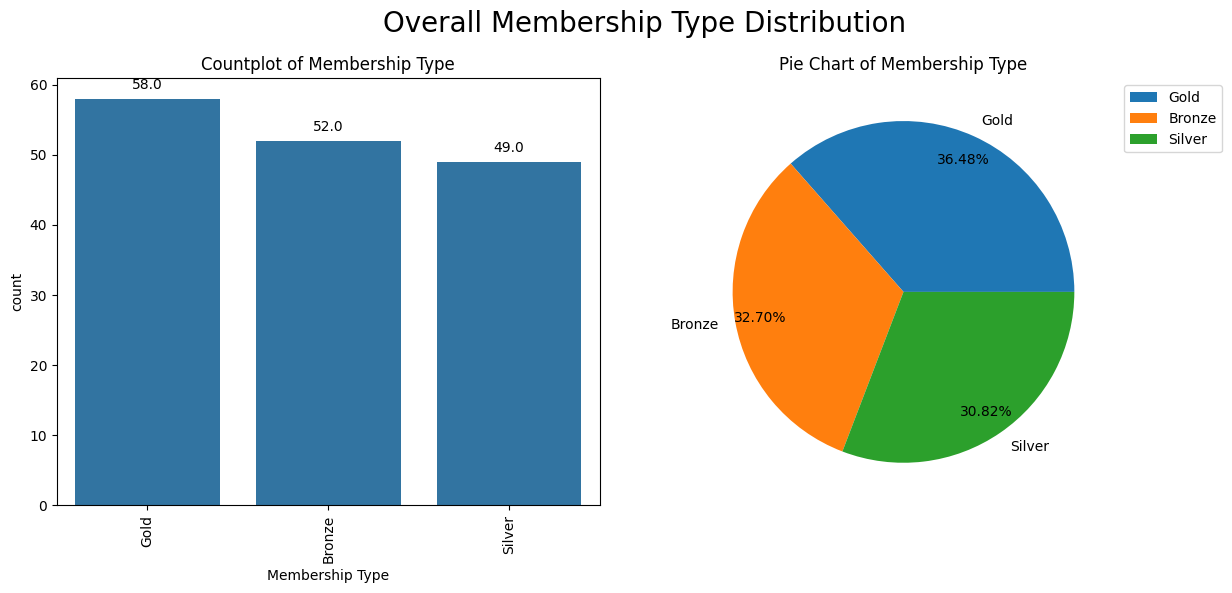

In [46]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Countplot
sns.countplot(x="Membership Type", data=df, ax=axes[0])
axes[0].set_title("Countplot of Membership Type")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Pie chart
explode = [0] * len(df["Membership Type"].value_counts())
axes[1].pie(df["Membership Type"].value_counts(), labels=df["Membership Type"].value_counts().index, autopct='%1.2f%%', explode=explode, pctdistance=0.85)
axes[1].set_title("Pie Chart of Membership Type")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Overall Membership Type Distribution", fontsize=20)

plt.tight_layout()
plt.show()

#### Satisfaction Level

C:\Users\Edidem\AppData\Local\Temp\ipykernel_21524\3270572561.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


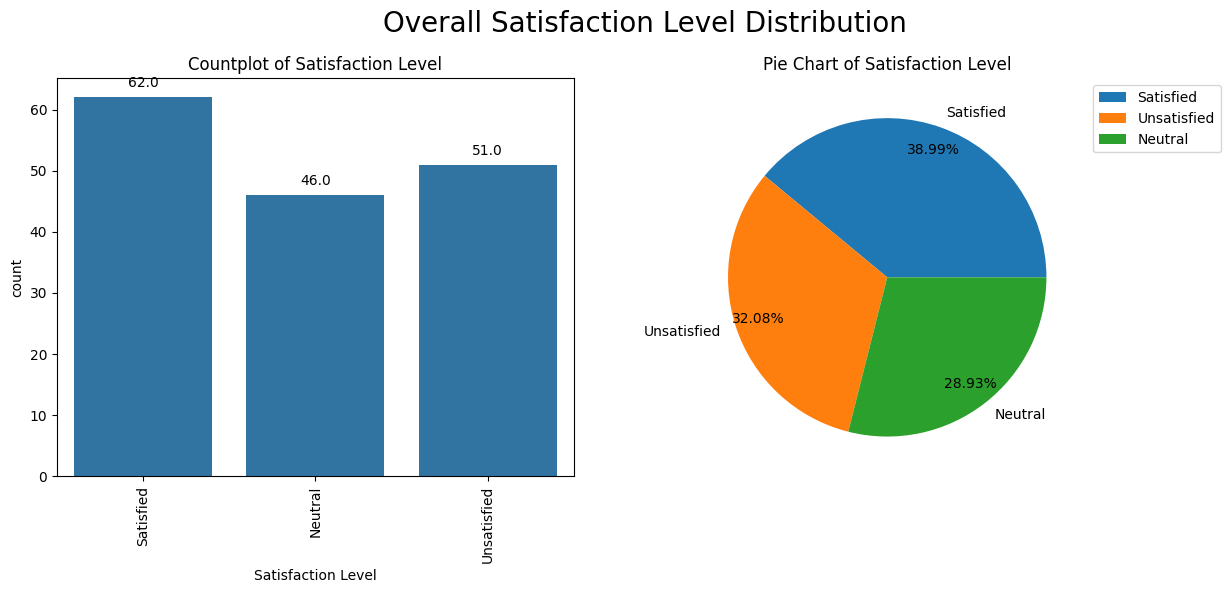

In [47]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Countplot
sns.countplot(x="Satisfaction Level", data=df, ax=axes[0])
axes[0].set_title("Countplot of Satisfaction Level")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Pie chart
explode = [0] * len(df["Satisfaction Level"].value_counts())
axes[1].pie(df["Satisfaction Level"].value_counts(), labels=df["Satisfaction Level"].value_counts().index, autopct='%1.2f%%', explode=explode, pctdistance=0.85)
axes[1].set_title("Pie Chart of Satisfaction Level")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Overall Satisfaction Level Distribution", fontsize=20)

plt.tight_layout()
plt.show()

#### Distribution of Numerical Features 

##### Histogram of Customer Age 

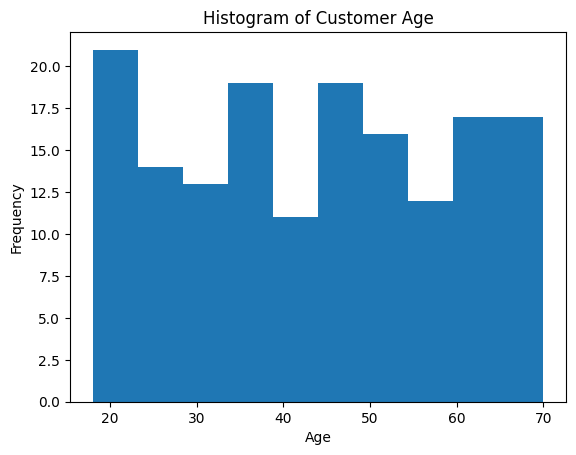

In [48]:
plt.hist(df['Customer Age'], bins=10)
plt.title('Histogram of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### Box plot of Product Price

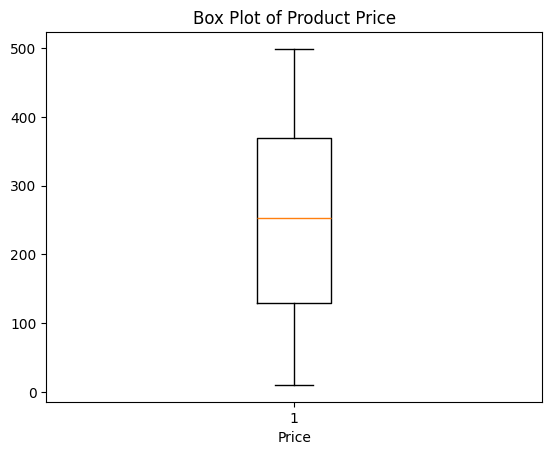

In [49]:
plt.boxplot(df['Product Price'])
plt.title('Box Plot of Product Price')
plt.xlabel('Price')
plt.show()

# Customer Segmentation Task

### Feature selection 

In [135]:
import pandas as pd

# Assuming df is the DataFrame containing the data
relevant_features = [
    'Customer ID', 'Customer Age', 'Gender', 'MaritalStatus', 'OrderCount', 
    'Total Purchase Amount', 'Days Since Last Purchase', 'Returns', 'Churn', 
    'HourSpendOnApp', 'NumberOfDeviceRegistered', 'Complain', 'Payment Method', 
    'Total Spend', 'Average Rating', 'Discount Applied'
]

segmentation_df = df[relevant_features]

# Display the first few rows of the segmentation_df to verify
segmentation_df.head()


,Customer ID,Customer Age,Gender,MaritalStatus,OrderCount,Total Purchase Amount,Days Since Last Purchase,Returns,Churn,HourSpendOnApp,NumberOfDeviceRegistered,Complain,Payment Method,Total Spend,Average Rating,Discount Applied
0,44605.0,31.0,Female,Single,1.0,2427.0,25.0,1.0,0.0,3.0,3.0,1.0,PayPal,1120.2,4.6,True
1,44605.0,31.0,Female,Single,1.0,937.0,12.0,0.0,0.0,2.0,4.0,0.0,Cash,1480.3,4.7,False
2,13738.0,27.0,Female,Single,6.0,3722.0,22.0,1.0,0.0,3.0,5.0,1.0,Credit Card,440.8,3.1,False
3,33969.0,27.0,Male,Single,1.0,3883.0,20.0,1.0,0.0,3.0,4.0,1.0,PayPal,470.5,3.2,False
4,33969.0,27.0,Male,Single,2.0,4187.0,21.0,0.0,0.0,2.0,3.0,1.0,PayPal,1200.8,4.3,True


### Encoding and Standardization

In [136]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'MaritalStatus', 'Payment Method', 'Discount Applied']

for col in categorical_columns:
    le = LabelEncoder()
    segmentation_df[col] = le.fit_transform(segmentation_df[col])
    label_encoders[col] = le

# Standardizing the dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(segmentation_df.drop(columns=['Customer ID']))

# Converting scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=segmentation_df.columns.drop('Customer ID'))

# Adding the 'Customer ID' column back to the DataFrame
scaled_df['Customer ID'] = segmentation_df['Customer ID'].values

# Display the first few rows of the processed DataFrame to verify
scaled_df.head()

C:\Users\Edidem\AppData\Local\Temp\ipykernel_12348\1003498782.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmentation_df[col] = le.fit_transform(segmentation_df[col])
C:\Users\Edidem\AppData\Local\Temp\ipykernel_12348\1003498782.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmentation_df[col] = le.fit_transform(segmentation_df[col])
C:\Users\Edidem\AppData\Local\Temp\ipykernel_12348\1003498782.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,Customer Age,Gender,MaritalStatus,OrderCount,Total Purchase Amount,Days Since Last Purchase,Returns,Churn,HourSpendOnApp,NumberOfDeviceRegistered,Complain,Payment Method,Total Spend,Average Rating,Discount Applied,Customer ID
0,-0.796793,-1.218349,1.264866,-0.552770,-0.259889,-0.098971,0.944911,-0.501965,1.084741,-0.454810,1.543690,1.327070,0.705913,0.960602,0.981307,44605.0
1,-0.796793,-1.218349,1.264866,-0.552770,-1.274980,-1.092045,-1.058301,-0.501965,-0.730773,0.860004,-0.647798,-1.199925,1.689616,1.130686,-1.019049,44605.0
2,-1.051831,-1.218349,1.264866,1.198034,0.622354,-0.328142,0.944911,-0.501965,1.084741,2.174817,1.543690,0.063572,-1.150038,-1.590663,-1.019049,13738.0
3,-1.051831,0.820783,1.264866,-0.552770,0.732038,-0.480923,0.944911,-0.501965,1.084741,0.860004,1.543690,1.327070,-1.068906,-1.420578,-1.019049,33969.0
4,-1.051831,0.820783,1.264866,-0.202609,0.939144,-0.404532,-1.058301,-0.501965,-0.730773,-0.454810,1.543690,1.327070,0.926092,0.450349,0.981307,33969.0


##### Data Split

In [137]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X = scaled_df.drop(columns=['Customer ID'])
y = segmentation_df['Customer ID']  # We won't actually use y for clustering, but we need it for the split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting splits to verify
X_train.shape, X_test.shape


((111, 15), (48, 15))

### Algorithm Testing

In [140]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# Dictionary to store the models and their evaluation scores
models = {
    'KMeans': KMeans(n_clusters=5, random_state=42),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=5),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'GaussianMixture': GaussianMixture(n_components=5, random_state=42)
}

# Training the models and evaluating them
evaluation_scores = []

for model_name, model in models.items():
    model.fit(X_train)
    if model_name == 'GaussianMixture':
        labels = model.predict(X_train)
    else:
        labels = model.labels_

    unique_labels = len(set(labels))
    if unique_labels > 1:
        silhouette_avg = silhouette_score(X_train, labels)
        davies_bouldin_avg = davies_bouldin_score(X_train, labels)
    else:
        silhouette_avg = None
        davies_bouldin_avg = None

    evaluation_scores.append({
        'Model': model_name,
        'Silhouette Score': silhouette_avg,
        'Davies-Bouldin Score': davies_bouldin_avg
    })

# Convert evaluation scores to a DataFrame for better display
evaluation_df = pd.DataFrame(evaluation_scores)

evaluation_df


,Model,Silhouette Score,Davies-Bouldin Score
0,KMeans,0.086383,2.517763
1,AgglomerativeClustering,0.069036,2.608870
2,DBSCAN,NaN,NaN
3,GaussianMixture,0.074784,2.601731


#### Hyperparameter Tuning

In [142]:
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid for KMeans
param_grid = {'n_clusters': np.arange(3, 11)}

# Print the parameter grid
print("Parameter grid for KMeans:", param_grid)

# Create a custom scorer for silhouette score
silhouette_scorer = make_scorer(silhouette_score)

# Initialize GridSearchCV with KMeans
grid = GridSearchCV(KMeans(random_state=42), param_grid, cv=5, scoring=silhouette_scorer)
grid.fit(X_train)

# Get the best parameters and the best model
best_params = grid.best_params_
best_kmeans = KMeans(**best_params, random_state=42)

# Print the best parameters
print("Best parameters for KMeans:", best_params)

# Train the best model with the best parameters on the full training set
best_kmeans.fit(X_train)
best_labels = best_kmeans.labels_

# Evaluating the best model
silhouette_avg = silhouette_score(X_train, best_labels)
davies_bouldin_avg = davies_bouldin_score(X_train, best_labels)

best_model_evaluation = {
    'silhouette_score': silhouette_avg,
    'davies_bouldin_score': davies_bouldin_avg,
    'best_params': best_params
}

# Convert the best model evaluation to a DataFrame for better display
best_model_evaluation_df = pd.DataFrame([best_model_evaluation])

best_model_evaluation_df


Parameter grid for KMeans: {'n_clusters': array([ 3,  4,  5,  6,  7,  8,  9, 10])}


c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_select

Best parameters for KMeans: {'n_clusters': 3}


,silhouette_score,davies_bouldin_score,best_params
0,0.098261,2.638991,{'n_clusters': 3}


In [143]:
# Fit the best model to the entire dataset
best_kmeans.fit(X)
full_labels = best_kmeans.labels_

# Adding the segment labels to the original DataFrame
segmentation_df['Segment'] = full_labels

# Display the first few rows of the DataFrame with segments
segmentation_df.head()


C:\Users\Edidem\AppData\Local\Temp\ipykernel_12348\1942368229.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmentation_df['Segment'] = full_labels


,Customer ID,Customer Age,Gender,MaritalStatus,OrderCount,Total Purchase Amount,Days Since Last Purchase,Returns,Churn,HourSpendOnApp,NumberOfDeviceRegistered,Complain,Payment Method,Total Spend,Average Rating,Discount Applied,Segment
0,44605.0,31.0,0,2,1.0,2427.0,25.0,1.0,0.0,3.0,3.0,1.0,2,1120.2,4.6,1,2
1,44605.0,31.0,0,2,1.0,937.0,12.0,0.0,0.0,2.0,4.0,0.0,0,1480.3,4.7,0,2
2,13738.0,27.0,0,2,6.0,3722.0,22.0,1.0,0.0,3.0,5.0,1.0,1,440.8,3.1,0,2
3,33969.0,27.0,1,2,1.0,3883.0,20.0,1.0,0.0,3.0,4.0,1.0,2,470.5,3.2,0,2
4,33969.0,27.0,1,2,2.0,4187.0,21.0,0.0,0.0,2.0,3.0,1.0,2,1200.8,4.3,1,2


C:\Users\Edidem\AppData\Local\Temp\ipykernel_12348\2185772720.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=segmentation_df, palette='viridis')


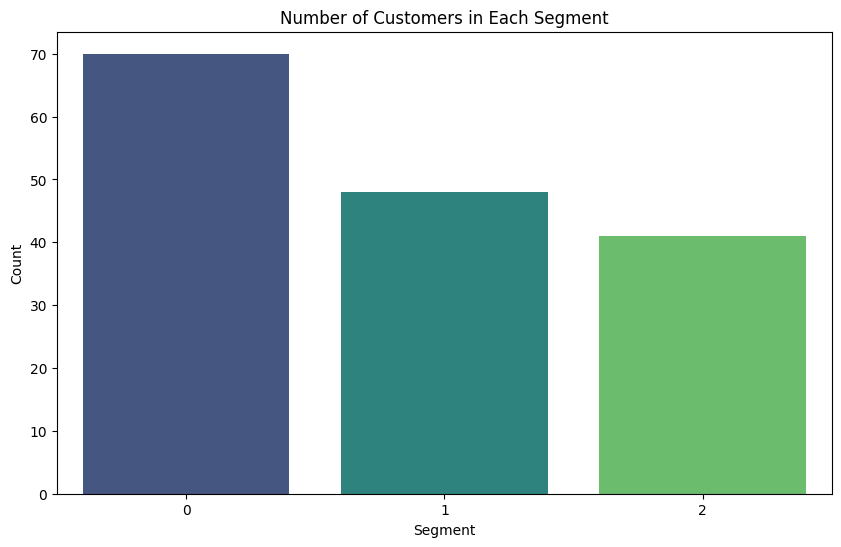

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for count of customers in each segment
plt.figure(figsize=(10, 6))
sns.countplot(x='Segment', data=segmentation_df, palette='viridis')
plt.title('Number of Customers in Each Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()


# Personalized Recommendation Task

### Feature Selection

In [26]:
# Select the relevant features for the recommendation system
selected_features = [
    'Customer ID', 'Product Category', 'Product Price', 'Quantity', 'Total Purchase Amount',
    'Customer Age', 'Gender', 'Country', 'PreferredLoginDevice', 'HourSpendOnApp',
    'NumberOfDeviceRegistered', 'PreferedOrderCat', 'OrderAmountHikeFromlastYear', 'OrderCount',
    'DaySinceLastOrder', 'CashbackAmount', 'Product ID', 'Sub-Category', 'Product Name', 'Sales',
    'Discount', 'Profit', 'Membership Type', 'Total Spend', 'Items Purchased', 'Average Rating',
    'Satisfaction Level'
]

# Create a new dataframe with the selected features
recommendation_df = df[selected_features]

# Display the first few rows of the recommendation dataframe
recommendation_df.head()


,Customer ID,Product Category,Product Price,Quantity,Total Purchase Amount,Customer Age,Gender,Country,PreferredLoginDevice,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount,Product ID,Sub-Category,Product Name,Sales,Discount,Profit,Membership Type,Total Spend,Items Purchased,Average Rating,Satisfaction Level
0,44605.0,Home,177.0,1.0,2427.0,31.0,Female,United Kingdom,Mobile Phone,3.0,3.0,Laptop & Accessory,11.0,1.0,5.0,159.93,OFF-PA-10000174,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,0.2,5.5512,Gold,1120.2,14.0,4.6,Satisfied
1,44605.0,Electronics,396.0,3.0,937.0,31.0,Female,United Kingdom,Phone,2.0,4.0,Laptop & Accessory,23.0,1.0,3.0,134.07,OFF-ST-10002743,Storage,SAFCO Boltless Steel Shelving,272.736,0.2,-64.7748,Gold,1480.3,19.0,4.7,Satisfied
2,13738.0,Home,191.0,3.0,3722.0,27.0,Female,United Kingdom,Computer,3.0,5.0,Mobile Phone,22.0,6.0,7.0,139.19,FUR-CH-10004063,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,0.0,746.4078,Bronze,440.8,8.0,3.1,Neutral
3,33969.0,Home,304.0,1.0,3883.0,27.0,Male,United Kingdom,Mobile Phone,3.0,4.0,Fashion,13.0,1.0,0.0,153.81,OFF-PA-10002005,Paper,Xerox 225,19.440,0.0,9.3312,Bronze,470.5,7.0,3.2,Neutral
4,33969.0,Books,54.0,2.0,4187.0,27.0,Male,United Kingdom,Phone,2.0,3.0,Mobile,13.0,2.0,2.0,134.41,TEC-PH-10004539,Phones,Wireless Extenders zBoost YX545 SOHO Signal Bo...,755.960,0.0,204.1092,Gold,1200.8,16.0,4.3,Satisfied


### Standardization and encoding

In [28]:
# Define numerical and categorical columns
numerical_columns = ['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age', 'HourSpendOnApp',
                     'NumberOfDeviceRegistered', 'OrderAmountHikeFromlastYear', 'OrderCount', 'DaySinceLastOrder',
                     'CashbackAmount', 'Sales', 'Discount', 'Profit', 'Total Spend', 'Items Purchased', 'Average Rating']

categorical_columns = ['Product Category', 'Gender', 'Country', 'PreferredLoginDevice', 'PreferedOrderCat', 
                       'Product ID', 'Sub-Category', 'Product Name', 'Membership Type', 'Satisfaction Level']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)


### Data Split

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
# Fit and transform the data
X = preprocessor.fit_transform(recommendation_df)

# Encode the target variable (PreferedOrderCat)
le = LabelEncoder()
y = le.fit_transform(recommendation_df['PreferedOrderCat'])

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 127
Testing set size: 32


## Algorithm Testing

#### Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression RMSE: {rmse_lr}")


Linear Regression RMSE: 0.12871803545685698


#### K-Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsRegressor

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f"K-Nearest Neighbors RMSE: {rmse_knn}")


K-Nearest Neighbors RMSE: 0.7566372975210778


#### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f"Decision Tree RMSE: {rmse_dt}")


Decision Tree RMSE: 0.3535533905932738


In [38]:
# Compile results into a DataFrame
results = {
    "Algorithm": ["Linear Regression", "K-Nearest Neighbors", "Decision Tree"],
    "RMSE": [rmse_lr, rmse_knn, rmse_dt]
}

results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

,Algorithm,RMSE
0,Linear Regression,0.128718
1,K-Nearest Neighbors,0.756637
2,Decision Tree,0.353553


### Hyperparameter Tuning 

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}



# Display the hyperparameter grid as a DataFrame
param_grid_df = pd.DataFrame(param_grid.items(), columns=['Hyperparameter', 'Values'])
param_grid_df





,Hyperparameter,Values
0,fit_intercept,"[True, False]"
1,copy_X,"[True, False]"


In [42]:
# Define the best parameters obtained from cross-validation
best_params_lr = grid_search.best_params_

# Convert the best parameters dictionary to a DataFrame
best_params_df = pd.DataFrame(best_params.items(), columns=['Hyperparameter', 'Best Value'])
best_params_df


,Hyperparameter,Best Value
0,copy_X,True
1,fit_intercept,True


In [43]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Evaluate the model with the best parameters
best_lr_model = grid_search.best_estimator_
y_pred_best_lr = best_lr_model.predict(X_test)
rmse_best_lr = np.sqrt(mean_squared_error(y_test, y_pred_best_lr))
print(f"Best Linear Regression RMSE: {rmse_best_lr}")


Best parameters found: {'copy_X': True, 'fit_intercept': True}
Best Linear Regression RMSE: 0.12871803545685698


In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Define numerical and categorical columns
numerical_columns = ['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age', 'HourSpendOnApp',
                     'NumberOfDeviceRegistered', 'OrderAmountHikeFromlastYear', 'OrderCount', 'DaySinceLastOrder',
                     'CashbackAmount', 'Sales', 'Discount', 'Profit', 'Total Spend', 'Items Purchased', 'Average Rating']

categorical_columns = ['Product Category', 'Gender', 'Country', 'PreferredLoginDevice', 'PreferedOrderCat', 
                       'Product ID', 'Sub-Category', 'Product Name', 'Membership Type', 'Satisfaction Level']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Fit and transform the data
X = preprocessor.fit_transform(recommendation_df)

# Encode the target variable (PreferedOrderCat)
le = LabelEncoder()
y = le.fit_transform(recommendation_df['PreferedOrderCat'])

# Fit the Linear Regression model to the training data
lr_model = LinearRegression()
lr_model.fit(X, y)

# Define the user ID for recommendation
user_id = 33969.0
	

# Filter the DataFrame to include only the relevant features for the user
user_data = recommendation_df[recommendation_df['Customer ID'] == user_id]

# Get the preferred order category for the user
user_category = user_data['PreferedOrderCat'].values[0]

# Filter the DataFrame to include only products in the preferred order category
user_data = recommendation_df[recommendation_df['PreferedOrderCat'] == user_category]

# Drop the 'Customer ID' column as it's not needed for prediction
user_data = user_data.drop('Customer ID', axis=1)

# Get the list of product IDs
product_ids = user_data['Product ID']

# Apply the same preprocessing steps as done for training data
user_data_processed = preprocessor.transform(user_data)

# Predict the total purchase amount for each product
predicted_purchase_amounts = lr_model.predict(user_data_processed)

# Combine the product IDs with their corresponding predicted purchase amounts
recommended_products = pd.DataFrame({'Product ID': product_ids, 'Predicted Purchase Amount': predicted_purchase_amounts})

# Sort the recommended products by predicted purchase amount in descending order
recommended_products = recommended_products.sort_values(by='Predicted Purchase Amount', ascending=False)

# Extract product names based on product IDs
product_names = recommendation_df[recommendation_df['Product ID'].isin(product_ids)]['Product Name'].values

# Print the recommended product names
print("Top Recommended Products")
for name in product_names:
    print(name)


Top Recommended Products
Global Deluxe High-Back Manager's Chair
Xerox 225
Howard Miller 14-1/2" Diameter Chrome Round Wall Clock
Avery Metallic Poly Binders
Fellowes Stor/Drawer Steel Plus Storage Drawers
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling
Fellowes Mighty 8 Compact Surge Protector
GBC DocuBind TL200 Manual Binding Machine
Pressboard Covers with Storage Hooks, 9 1/2" x 11", Light Blue
Enermax Aurora Lite Keyboard
Staples
Avery Flip-Chart Easel Binder, Black
Hon 2111 Invitation Series Corner Table
Wilson Jones Leather-Like Binders with DublLock Round Rings
GBC Plastic Binding Combs
Fellowes Premier Superior Surge Suppressor, 10-Outlet, With Phone and Remote
Global Deluxe High-Back Manager's Chair
Xerox 1972
Hon 30" x 60" Table with Locking Drawer
Wilson Jones 14 Line Acrylic Coated Pressboard Data Binders
Bush Heritage Pine Collection 5-Shelf Bookcase, Albany Pine Finish, *Special Order
Avery Flip-Chart Easel Binder, Black
Cisco 8x8 Inc. 6753i IP Business Phone Sy

## Fraud Detection Task

### Feature Selection

In [24]:
import pandas as pd

# Select relevant features for anomaly detection
features = [
    'Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age',
    'Churn', 'UnitPrice', 'WarehouseToHome', 'HourSpendOnApp', 
    'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
    'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
    'payment', 'rating', 'payment_installments', 'Sales', 'Discount', 
    'Profit', 'Total Spend', 'Items Purchased', 'Average Rating', 
    'Days Since Last Purchase'
]
fraud_df = df[features]

fraud_df.head()




,Product Price,Quantity,Total Purchase Amount,Customer Age,Churn,UnitPrice,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,payment,rating,payment_installments,Sales,Discount,Profit,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
0,177.0,1.0,2427.0,31.0,0.0,2.55,6.0,3.0,3.0,9.0,11.0,1.0,1.0,5.0,159.93,1095.65,5.0,5.0,16.448,0.2,5.5512,1120.2,14.0,4.6,25.0
1,396.0,3.0,937.0,31.0,0.0,3.39,15.0,2.0,4.0,8.0,23.0,0.0,1.0,3.0,134.07,585.95,4.0,1.0,272.736,0.2,-64.7748,1480.3,19.0,4.7,12.0
2,191.0,3.0,3722.0,27.0,0.0,7.65,22.0,3.0,5.0,2.0,22.0,4.0,6.0,7.0,139.19,238.61,5.0,8.0,2573.820,0.0,746.4078,440.8,8.0,3.1,22.0
3,304.0,1.0,3883.0,27.0,0.0,2.10,6.0,3.0,4.0,10.0,13.0,0.0,1.0,0.0,153.81,1629.33,5.0,1.0,19.440,0.0,9.3312,470.5,7.0,3.2,20.0
4,54.0,2.0,4187.0,27.0,0.0,3.75,11.0,2.0,3.0,2.0,13.0,2.0,2.0,2.0,134.41,428.80,5.0,3.0,755.960,0.0,204.1092,1200.8,16.0,4.3,21.0


### Handle Categorical Variables

In [25]:
# Handle categorical variables if any
categorical_columns =fraud_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
   fraud_df[col] = LabelEncoder().fit_transform(fraud_df[col])
# Display the first few rows to verify
fraud_df.head()


,Product Price,Quantity,Total Purchase Amount,Customer Age,Churn,UnitPrice,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,payment,rating,payment_installments,Sales,Discount,Profit,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
0,177.0,1.0,2427.0,31.0,0.0,2.55,6.0,3.0,3.0,9.0,11.0,1.0,1.0,5.0,159.93,1095.65,5.0,5.0,16.448,0.2,5.5512,1120.2,14.0,4.6,25.0
1,396.0,3.0,937.0,31.0,0.0,3.39,15.0,2.0,4.0,8.0,23.0,0.0,1.0,3.0,134.07,585.95,4.0,1.0,272.736,0.2,-64.7748,1480.3,19.0,4.7,12.0
2,191.0,3.0,3722.0,27.0,0.0,7.65,22.0,3.0,5.0,2.0,22.0,4.0,6.0,7.0,139.19,238.61,5.0,8.0,2573.820,0.0,746.4078,440.8,8.0,3.1,22.0
3,304.0,1.0,3883.0,27.0,0.0,2.10,6.0,3.0,4.0,10.0,13.0,0.0,1.0,0.0,153.81,1629.33,5.0,1.0,19.440,0.0,9.3312,470.5,7.0,3.2,20.0
4,54.0,2.0,4187.0,27.0,0.0,3.75,11.0,2.0,3.0,2.0,13.0,2.0,2.0,2.0,134.41,428.80,5.0,3.0,755.960,0.0,204.1092,1200.8,16.0,4.3,21.0


### Identify anomaly

In [26]:
from sklearn.ensemble import IsolationForest

# Train the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)
fraud_df['fraud'] = iso_forest.fit_predict(fraud_df)

# Convert anomaly labels to binary fraud labels
fraud_df['fraud'] = fraud_df['fraud'].apply(lambda x: 1 if x == -1 else 0)

# Verify the new column
print(fraud_df['fraud'].value_counts())

fraud
0    143
1     16
Name: count, dtype: int64


C:\Users\Edidem\AppData\Local\Temp\ipykernel_12348\3192257161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['fraud'] = iso_forest.fit_predict(fraud_df)
C:\Users\Edidem\AppData\Local\Temp\ipykernel_12348\3192257161.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['fraud'] = fraud_df['fraud'].apply(lambda x: 1 if x == -1 else 0)


### Split the Dataset into Features and Target

In [27]:
# Define features and target
target = 'fraud'
features = fraud_df.columns.drop(target)

# Encode categorical features
categorical_columns = fraud_df[features].select_dtypes(include=['object']).columns
for col in categorical_columns:
    fraud_df[col] = LabelEncoder().fit_transform(fraud_df[col])


### Split the Data into Training and Testing Sets

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fraud_df[features], fraud_df[target], test_size=0.3, random_state=42)

# Display the shapes to verify
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((111, 25), (48, 25), (111,), (48,))

### Standardize the Features

In [29]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the first few rows to verify
pd.DataFrame(X_train).head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.193323,0.848752,1.385077,-0.727729,-0.483046,-0.652672,-0.162807,1.081771,-0.522961,0.327147,-0.854939,-0.666378,-0.504165,1.051329,0.568545,-0.934096,0.639635,-0.915098,-0.139727,0.309500,0.027758,-0.459674,-0.177729,-0.222806,1.607715
1,1.578946,0.848752,0.158816,0.880111,2.070197,1.628826,-0.812862,1.081771,0.859150,-0.055098,-0.854939,-0.666378,-0.504165,-1.236857,0.104830,0.394925,-2.258305,-0.221747,-0.297649,0.309500,0.172164,-1.159987,-1.352006,-1.075613,-0.257682
2,1.285693,-0.708462,0.070738,0.429916,2.070197,-0.652672,-0.552840,-0.710417,-0.522961,-0.819589,0.849819,3.378742,1.843906,1.051329,1.305921,-1.039622,0.639635,-0.915098,-0.531710,-0.723718,-0.087817,-0.904041,-0.882295,-1.246174,1.063640
3,-1.529542,-1.487070,-0.407886,-1.435178,-0.483046,0.542398,1.527336,1.081771,2.241262,-0.055098,-1.139065,-0.088503,-0.112820,-0.583090,-0.650084,0.346432,0.639635,1.164954,-0.514916,-0.723718,-0.088404,-1.159987,-1.352006,-1.075613,-0.257682
4,0.765167,0.070145,-0.615450,-0.148906,-0.483046,-0.652672,-1.072883,-0.710417,-0.522961,-0.437344,-1.139065,-0.088503,-0.504165,-0.583090,0.245535,-0.758167,0.639635,-0.915098,0.091109,0.309500,-0.268473,-0.918463,-0.882295,-0.905051,0.830466


## Algorithm Testing

### Model Definition

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}



### Train and evaluate model

In [31]:
# Train and evaluate models
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    })

results_df = pd.DataFrame(results)
results_df


c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.770833,0.333333,0.1,0.153846,0.784211
1,Random Forest,0.791667,0.000000,0.0,0.000000,0.792105
2,Gradient Boosting,0.770833,0.400000,0.2,0.266667,0.844737
3,SVM,0.791667,0.000000,0.0,0.000000,0.905263


Gradient Boosting Classifier has the highest accuracy, precision, recall, F1 score, and ROC AUC among the models evaluated.

### Hyperparamter tunning of Gradient Boosting Classifier

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9]
}

param_grid_df = pd.DataFrame(param_grid)

param_grid_df



,n_estimators,learning_rate,max_depth,subsample
0,50,0.01,3,0.7
1,100,0.05,4,0.8
2,150,0.10,5,0.9


In [44]:
# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

tuned_results = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_prob)
}

tuned_results_df = pd.DataFrame([tuned_results], index=['Tuned Gradient Boosting'])
tuned_results_df


Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.8}


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Tuned Gradient Boosting,0.791667,0.5,0.2,0.285714,0.715789


## Demand Forecasting Task

### Feature Selection

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Selecting the necessary columns for demand forecasting
selected_columns = ['timestamp', 'Quantity', 'Product Category', 'Total Purchase Amount']
df_forecasting = df[selected_columns]

# Convert 'timestamp' column to datetime format
df_forecasting['timestamp'] = pd.to_datetime(df_forecasting['timestamp'])

# Extract year and month from 'timestamp' and assign it to the DataFrame using .loc
df_forecasting.loc[:, 'Year-Month'] = df_forecasting['timestamp'].dt.to_period('M')

# Group by 'Year-Month' and calculate total quantity purchased
demand_over_time = df_forecasting.groupby('Year-Month')['Quantity'].sum().reset_index()

# Check and handle non-numeric values in 'Quantity' column
demand_over_time['Quantity'] = pd.to_numeric(demand_over_time['Quantity'], errors='coerce')

df_forecasting.head()


C:\Users\Edidem\AppData\Local\Temp\ipykernel_12348\3824699102.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forecasting['timestamp'] = pd.to_datetime(df_forecasting['timestamp'])
C:\Users\Edidem\AppData\Local\Temp\ipykernel_12348\3824699102.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forecasting.loc[:, 'Year-Month'] = df_forecasting['timestamp'].dt.to_period('M')


,timestamp,Quantity,Product Category,Total Purchase Amount,Year-Month
0,2017-11-21 22:34:00,1.0,Home,2427.0,2017-11
1,2018-01-06 22:22:00,3.0,Electronics,937.0,2018-01
2,2018-04-08 21:57:00,3.0,Home,3722.0,2018-04
3,2017-07-18 14:26:00,1.0,Home,3883.0,2017-07
4,2018-07-16 12:41:00,2.0,Books,4187.0,2018-07


#### Preprocessing

In [111]:
# Ensure the 'Total Purchase Amount' column is numeric
df_forecasting['Total Purchase Amount'] = pd.to_numeric(df_forecasting['Total Purchase Amount'], errors='coerce')

# Select features (X) and target variable (y)
X = df_forecasting.drop(columns=['Total Purchase Amount', 'timestamp', 'Year-Month'])
y = df_forecasting['Total Purchase Amount']

# Define preprocessing for numeric features
numeric_features = X.select_dtypes(include=['float64']).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)


C:\Users\Edidem\AppData\Local\Temp\ipykernel_12348\801827034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forecasting['Total Purchase Amount'] = pd.to_numeric(df_forecasting['Total Purchase Amount'], errors='coerce')


#### Model Training

In [112]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Fit ARIMA model
arima_model = ARIMA(y_train, order=(5, 1, 0))
arima_fit = arima_model.fit()

# Make predictions
start = len(y_train)
end = start + len(y_test) - 1
arima_predictions = arima_fit.predict(start=start, end=end, typ='levels')

# Calculate MAE
arima_mae = mean_absolute_error(y_test, arima_predictions)
print("ARIMA MAE:", arima_mae)

# Fit SARIMA model
sarima_model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Make predictions
sarima_predictions = sarima_fit.forecast(steps=len(X_test))

# Calculate MAE
sarima_mae = mean_absolute_error(y_test, sarima_predictions)
print("SARIMA MAE:", sarima_mae)

# Fit Holt-Winters Exponential Smoothing model
hw_model = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add').fit()

# Make predictions
hw_predictions = hw_model.forecast(steps=len(X_test))

# Calculate MAE
hw_mae = mean_absolute_error(y_test, hw_predictions)
print("Holt-Winters MAE:", hw_mae)

# Print MAE for each model
print("ARIMA MAE:", arima_mae)
print("SARIMA MAE:", sarima_mae)
print("Holt-Winters MAE:", hw_mae)

# Choose the model with the lowest MAE
best_model = min(arima_mae, sarima_mae, hw_mae)

# Print the best model
if best_model == arima_mae:
    print("Best Model: ARIMA")
elif best_model == sarima_mae:
    print("Best Model: SARIMA")
else:
    print("Best Model: Holt-Winters Exponential Smoothing")


c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Edidem\AppData\

ARIMA MAE: 1357.052640008899


c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be igno

SARIMA MAE: 1342.8357924197544
Holt-Winters MAE: 1245.6007666986382
ARIMA MAE: 1357.052640008899
SARIMA MAE: 1342.8357924197544
Holt-Winters MAE: 1245.6007666986382
Best Model: Holt-Winters Exponential Smoothing


c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### Hyperparamter tunning of Holt-Winters Exponential Smoothing

In [133]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming y_train and y_test are already defined from the previous steps

# Define parameter grid
trend_options = ['add', 'mul', None]
seasonal_options = ['add', 'mul', None]

# Print the parameter grid
print("Parameter grid:")
print("Trend options:", trend_options)
print("Seasonal options:", seasonal_options)

best_hw_model = None
best_mae = np.inf
best_trend = None
best_seasonal = None

# Grid search over parameters
for trend in trend_options:
    for seasonal in seasonal_options:
        if trend is None and seasonal is None:
            continue
        try:
            hw_model = ExponentialSmoothing(y_train, seasonal_periods=12, trend=trend, seasonal=seasonal).fit()
            hw_predictions = hw_model.forecast(steps=len(y_test))
            hw_mae = mean_absolute_error(y_test, hw_predictions)
            if hw_mae < best_mae:
                best_mae = hw_mae
                best_hw_model = hw_model
                best_trend = trend
                best_seasonal = seasonal
        except Exception as e:
            print(f"Failed to fit model with trend={trend}, seasonal={seasonal}. Error: {e}")

# Print the best parameters and the corresponding MAE
print(f"Best Holt-Winters model: trend={best_trend}, seasonal={best_seasonal}, MAE={best_mae}")


Parameter grid:
Trend options: ['add', 'mul', None]
Seasonal options: ['add', 'mul', None]


c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction

Best Holt-Winters model: trend=None, seasonal=mul, MAE=1222.1079442821742


c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warning